In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/content/Ice_cream selling data (1).csv")
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [4]:
df.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [5]:
df.shape

(49, 2)

In [6]:
print(df.duplicated().sum())

0


In [7]:
print(df.duplicated())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
dtype: bool


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

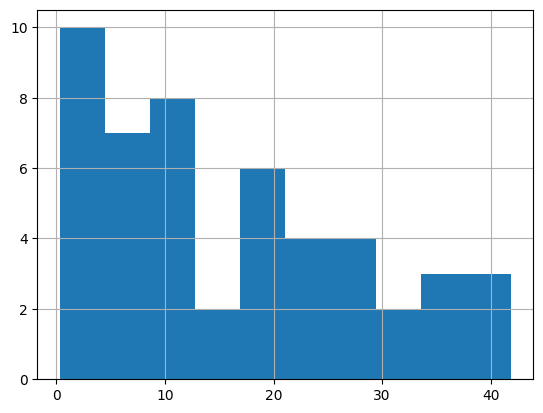

In [9]:
# Histogram shows the weigntage of each value in the chosen column
df['Ice Cream Sales (units)'].hist(bins=10)

<Axes: >

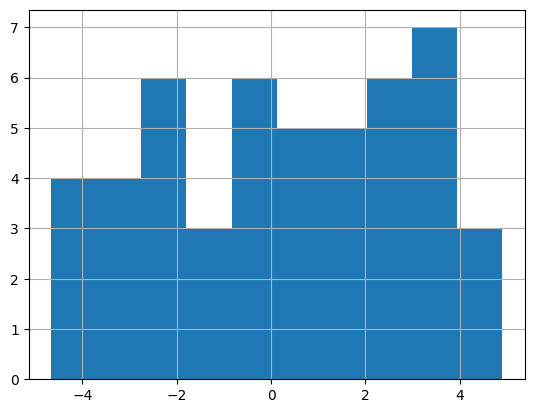

In [10]:
# Histogram shows the weigntage of each value in the chosen column
df['Temperature (°C)'].hist(bins=10)

<Axes: xlabel='Temperature (°C)', ylabel='Ice Cream Sales (units)'>

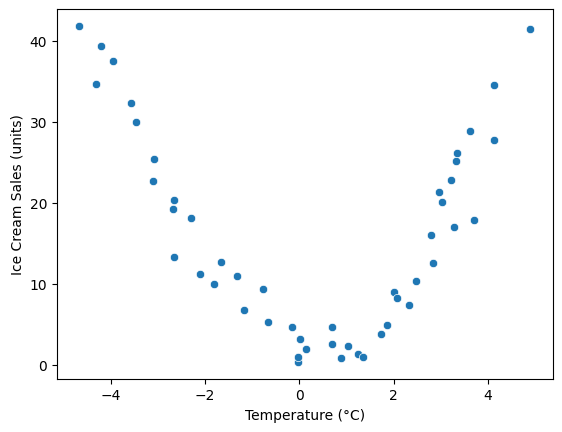

In [12]:
#seaborn liibrary used to plot dot graph in 1 d plain
sns.scatterplot(x="Temperature (°C)", y='Ice Cream Sales (units)', data=df)

<Axes: >

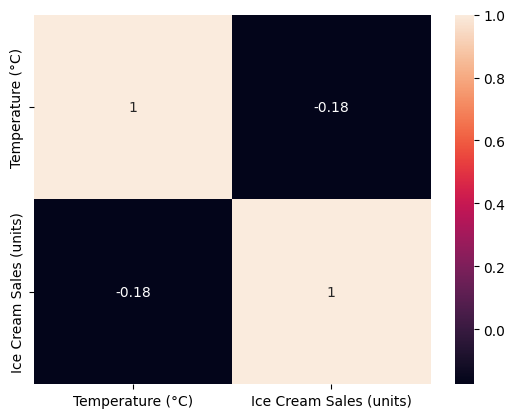

In [13]:
#deals in mathamatical numeric reltion between two variables
corr = df.corr()
sns.heatmap(corr, annot=True)

In [15]:
# delete rows with null values
df_clean = df.dropna(axis=0)

In [16]:
# delete columns with null values
df_clean = df.dropna(axis=1)

In [17]:
#replace null values  with mean
df['Temperature (°C)'] = df['Temperature (°C)'].fillna(df['Temperature (°C)'].mean())
df['Ice Cream Sales (units)'] = df['Ice Cream Sales (units)'].fillna(df['Ice Cream Sales (units)'].mean())

In [18]:
# remove duplicate values
df = df.drop_duplicates()

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Temperature (°C)', 'Ice Cream Sales (units)']] = scaler.fit_transform(df[['Temperature (°C)', 'Ice Cream Sales (units)']])

In [21]:
from sklearn.model_selection import train_test_split

In [26]:
#seperating INPUT and OUTPUT COLUNS
X = df[["Temperature (°C)"]]
y = df['Ice Cream Sales (units)']
#Spliting into test and train data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )

In [27]:
# Convert linear X → polynomial X (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [28]:
# Model
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [34]:
pred = model.predict(X_poly)

In [32]:
print("Prediction for x=6:", pred[0])

Prediction for x=6: 2.5257009473883256


In [38]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [39]:
# Actual values
y_true = y   # your original y

# Predicted values
y_pred = model.predict(X_poly)

# Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print("R² Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R² Score: 1.0
MAE: 1.1368683772161604e-14
MSE: 2.423380700838948e-28
RMSE: 1.556721137788958e-14
